# Mestrado 2023 - Implementações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from optimize import fit_data
import optimize
from new_wave import get_transition_points

In [2]:
# Import data
data = pd.read_csv("../Datasets/rosario_hosp.csv") 
city_name = 'Rosario' 
indicator='hospitalizations'

In [3]:
data.columns

Index(['Unnamed: 0', 'cidade', 'date', 'new_hospitalized_patients',
       'cumulative_hospitalized_patients'],
      dtype='object')

In [35]:
# Get cummulative indicator from daily data
daily_data = data.new_hospitalized_patients.tolist()
acc_data = []
for i in range(len(daily_data)):
    acc_data.append(np.sum(daily_data[:i]))

# 12th day (15/03/2020)
acc_data = np.array(acc_data[12:])

# time array
t = np.linspace(0, len(acc_data)-1, len(acc_data))

normalized_acc_data = acc_data / max(acc_data)

#scaling_factor = 500
scaling_factor = max(acc_data)
acc_data = acc_data / scaling_factor
daily_data = list(data.new_hospitalized_patients/ scaling_factor)

In [36]:
# Initial Conditions

def initial_cond_0(y_t):
    A0 = 2*max(y_t)
    tp0 = (2/3)*len(y_t)
    delta0 = (1/4)*len(y_t)
    nu0 = 1
    return [A0, tp0, delta0, nu0]

optimize.initial_cond = initial_cond_0

def update_cond_nw(A0, tp0):
    return [A0, tp0]
    
optimize.update_cond = update_cond_nw

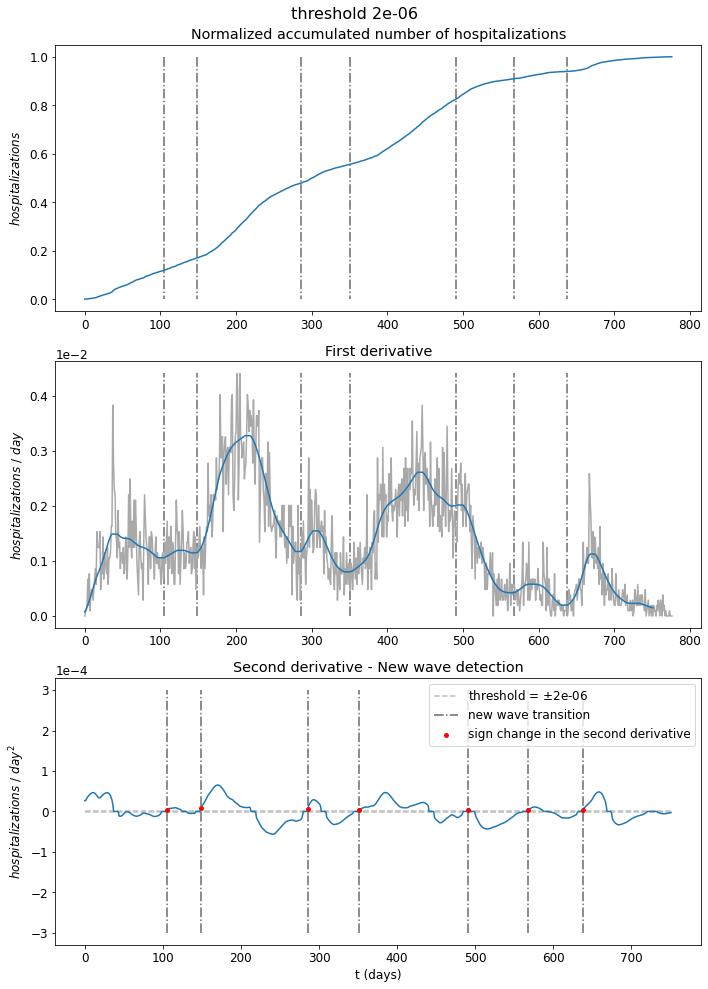

x_nw: [149, 286, 351, 491, 568]


In [37]:
# Transition Points
x_nw = get_transition_points(acc_data, visual=True, threshold=2e-6, indicator = indicator)
x_nw = x_nw[1:6]

print('x_nw:', x_nw)

### Ajuste do modelo utilizando MSE

Sigmoid #1 - A0:0.20165636365803496 | tp0:90.00035390076667 | delta0:33.75004405548199 | nu0:1.0 
(optimal) Sigmoid #1 - A0:0.20165636365803496 | tp0:90.00035390076667 | delta0:33.75004405548199 | nu0:1.0 
Sigmoid #2 - A0:0.10247383044793777 | tp0:90.00051252324147 | delta0:33.750153722117005 | nu0:1.0 
(optimal) Sigmoid #2 - A0:0.10247383044793777 | tp0:90.00051252324147 | delta0:33.750153722117005 | nu0:1.0 
Sigmoid #3 - A0:0.061773392948930764 | tp0:90.00058458302722 | delta0:33.75020412070446 | nu0:1.0 
(optimal) Sigmoid #3 - A0:0.061773392948930764 | tp0:90.00058458302722 | delta0:33.75020412070446 | nu0:1.0 
Sigmoid #4 - A0:0.11217747909991413 | tp0:90.00066512549203 | delta0:33.75026802107651 | nu0:1.0 
(optimal) Sigmoid #4 - A0:0.11217747909991413 | tp0:90.00066512549203 | delta0:33.75026802107651 | nu0:1.0 
Sigmoid #5 - A0:0.06916530878123132 | tp0:90.00075534029689 | delta0:33.75034550425848 | nu0:1.0 


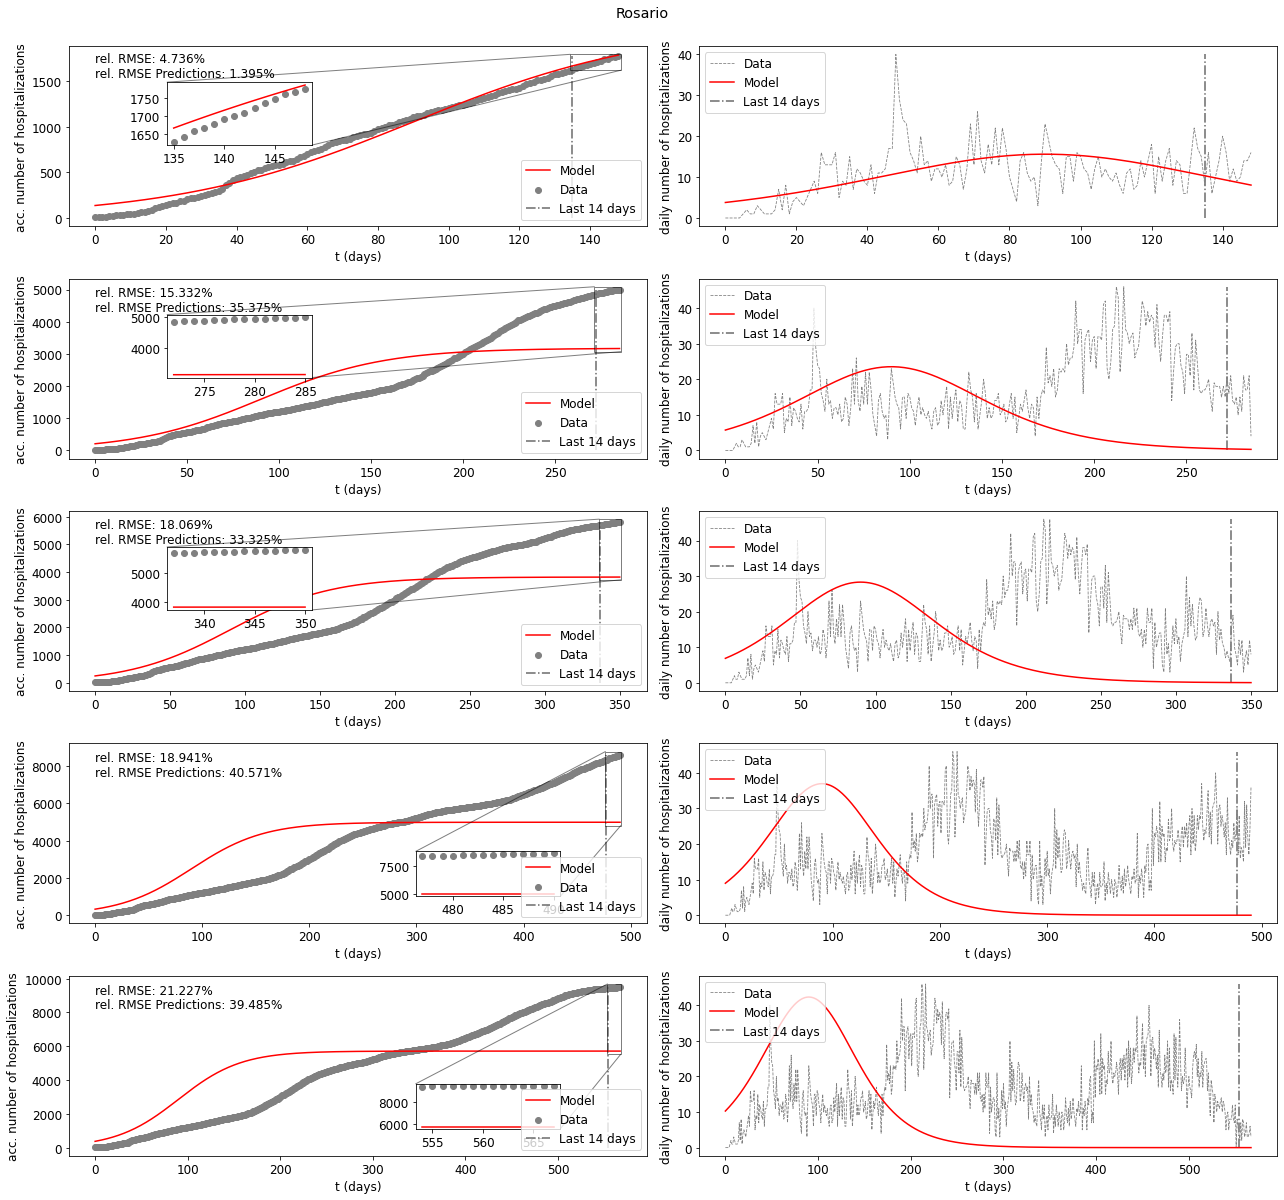

In [38]:
sig_params = optimize.fit_data(acc_data, 
                               daily_data, 
                               city_name, 
                               x_nw, 
                               indicator = indicator, 
                               n_weeks_pred = 2,
                               scaling_factor = scaling_factor,
                               loss_function = 'MSE'
                            )

### Ajuste do modelo utilizando ITSE

Sigmoid #1 - A0:0.17016977219589008 | tp0:75.38254747536311 | delta0:29.977285387830246 | nu0:1.0 
(optimal) Sigmoid #1 - A0:0.17016977219589008 | tp0:75.38254747536311 | delta0:29.977285387830246 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #2 - A0:0.27811336239829987 | tp0:211.54095589579615 | delta0:20.941716754317014 | nu0:1.0 
(optimal) Sigmoid #2 - A0:0.27811336239829987 | tp0:211.54095589579615 | delta0:20.941716754317014 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #3 - A0:0.0523804238938018 | tp0:308.2814357500625 | delta0:9.751242273111435 | nu0:1.0 
(optimal) Sigmoid #3 - A0:0.0523804238938018 | tp0:308.2814357500625 | delta0:9.751242273111435 | nu0:1.0 
Sigmoid #4 - A0:0.2861288708366625 | tp0:432.22300548121905 | delta0:26.58362915397633 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #4 - A0:0.2861288708366625 | tp0:432.22300548121905 | delta0:26.58362915397633 | nu0:1.0 
Sigmoid #5 - A0:-8.367127823927234e-11 | tp0:467.2295534505123 | delta0:62.137356993588256 | nu0:1.0 


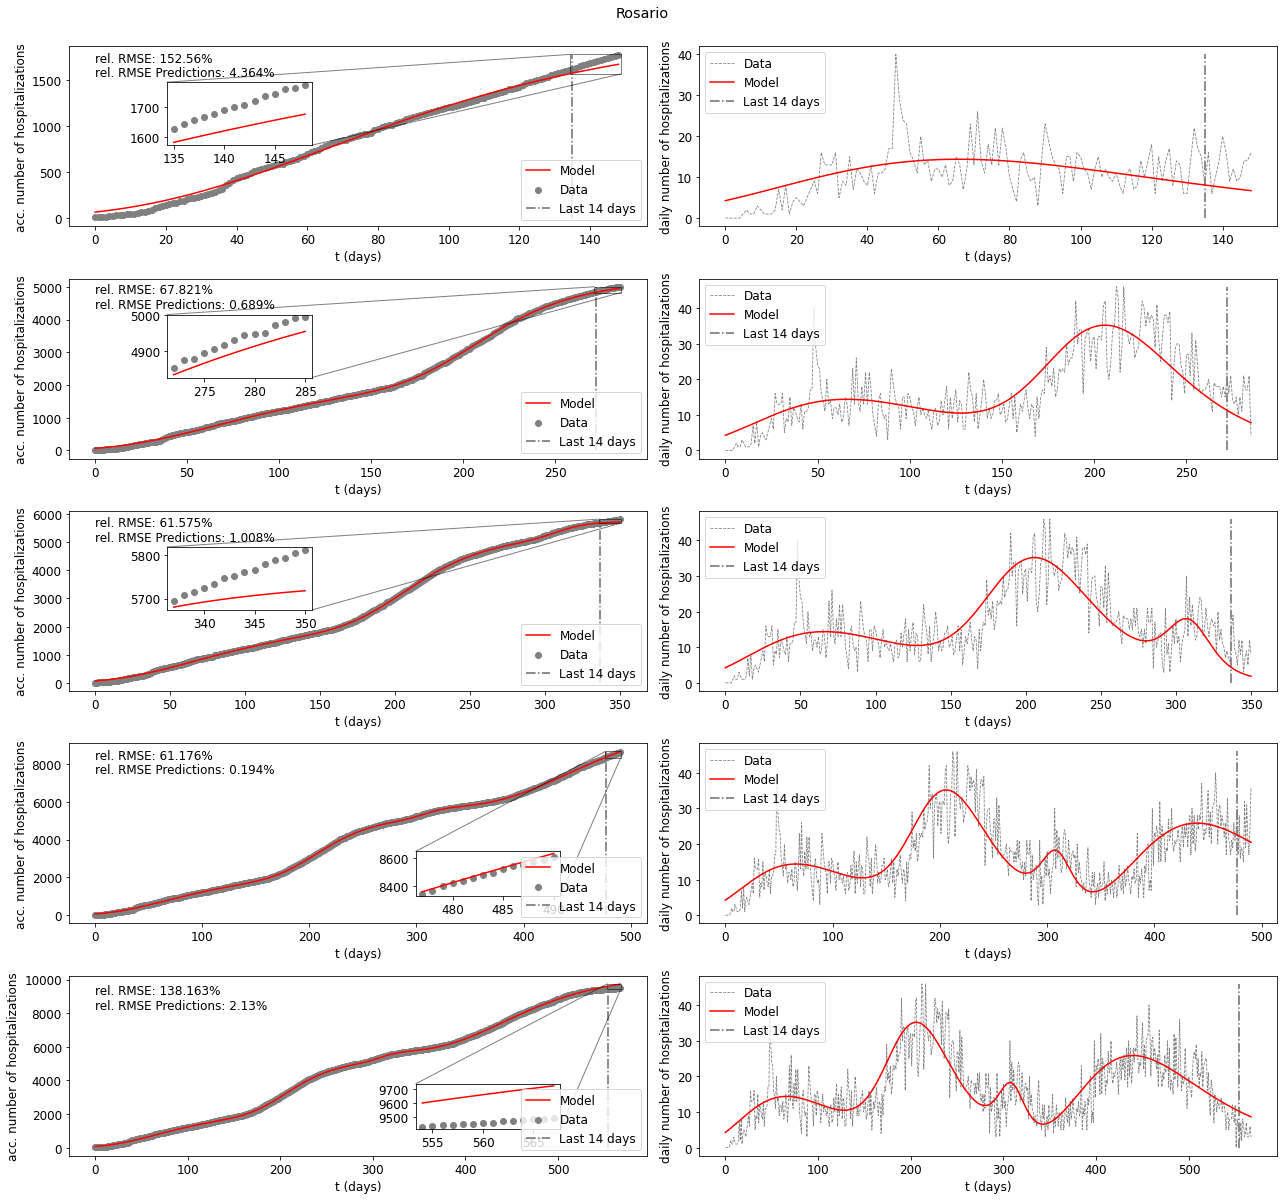

In [39]:
sig_params, rel_rmse_list, y_m = optimize.fit_data(acc_data, 
                               daily_data, 
                               city_name, 
                               x_nw, 
                               indicator = indicator, 
                               n_weeks_pred = 2,
                               scaling_factor = scaling_factor,
                               loss_function = 'ITSE'
                            )

### Ajuste do modelo utilizando MTSE

Sigmoid #1 - A0:0.20165636365803496 | tp0:90.00035390076667 | delta0:33.75004405548199 | nu0:1.0 
(optimal) Sigmoid #1 - A0:0.20165636365803496 | tp0:90.00035390076667 | delta0:33.75004405548199 | nu0:1.0 
Sigmoid #2 - A0:0.10717870387011044 | tp0:90.00051602008962 | delta0:33.750144697685556 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #2 - A0:0.10717870387011044 | tp0:90.00051602008962 | delta0:33.750144697685556 | nu0:1.0 
Sigmoid #3 - A0:0.005988835950096145 | tp0:90.00055027157285 | delta0:33.75017717627985 | nu0:1.0 
(optimal) Sigmoid #3 - A0:0.005988835950096145 | tp0:90.00055027157285 | delta0:33.75017717627985 | nu0:1.0 
Sigmoid #4 - A0:0.05219422631857633 | tp0:90.00055928029553 | delta0:33.75018549105772 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #4 - A0:0.05219422631857633 | tp0:90.00055928029553 | delta0:33.75018549105772 | nu0:1.0 
Sigmoid #5 - A0:0.0 | tp0:90.00056510379738 | delta0:33.75019085032437 | nu0:1.0 


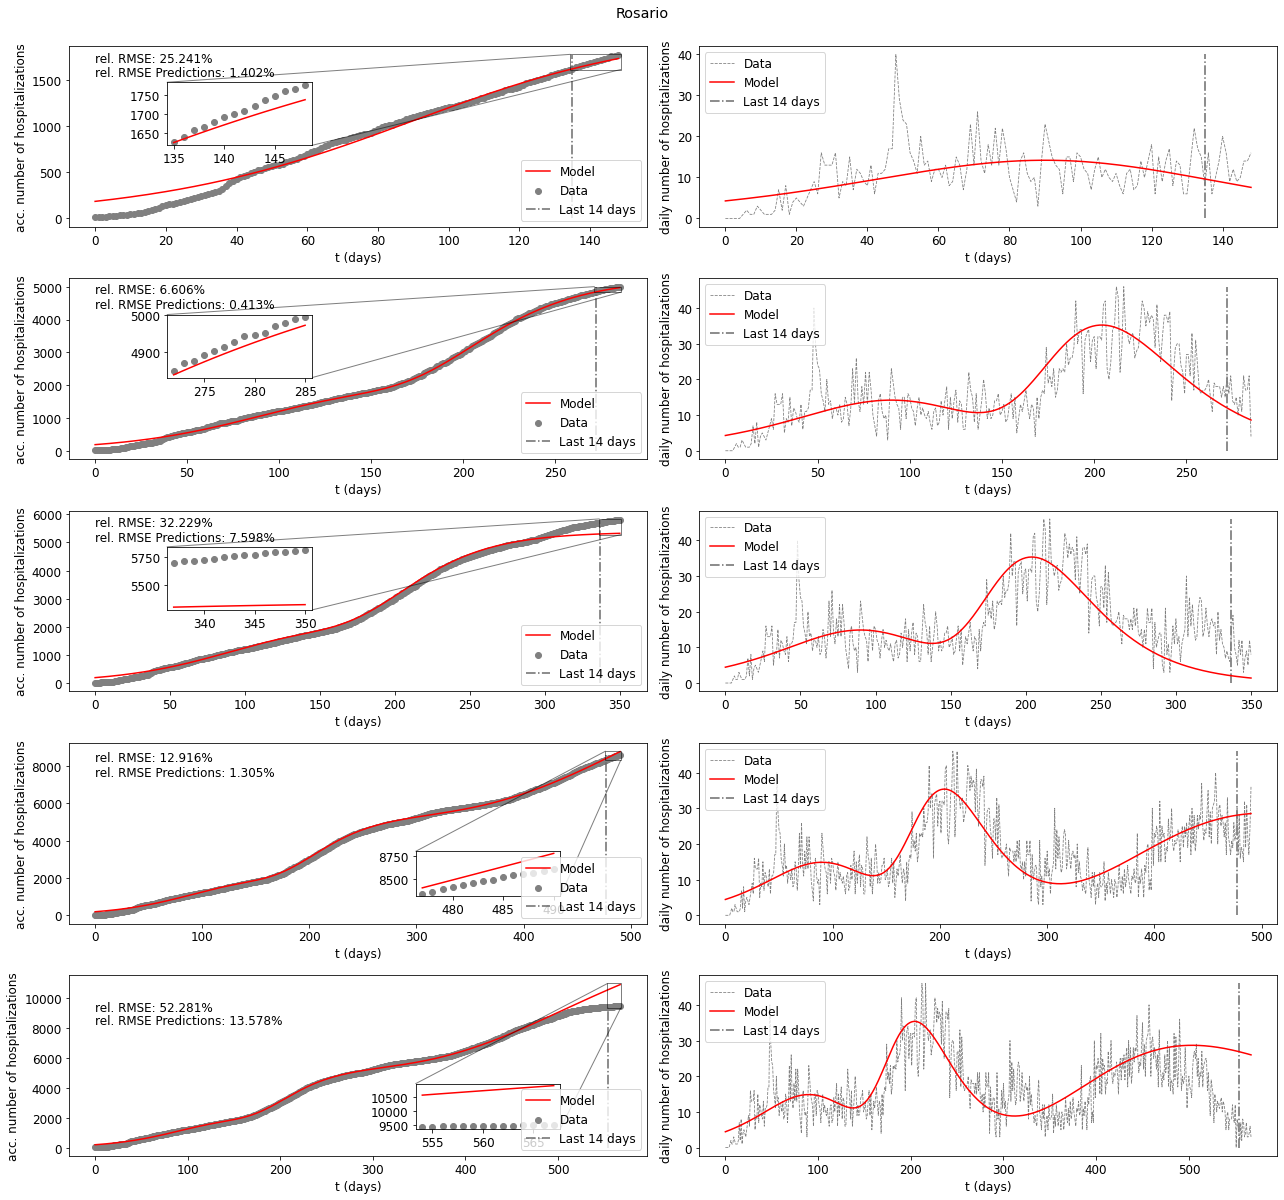

In [40]:
sig_params, rel_rmse_list, y_m = optimize.fit_data(acc_data, 
                               daily_data, 
                               city_name, 
                               x_nw, 
                               indicator = indicator, 
                               n_weeks_pred = 2,
                               scaling_factor = scaling_factor,
                               loss_function = 'MTSE'
                            )

### Explorando métricas de erro

In [41]:
def plotErrorFns(x, y, y_h):
    fig, axs = plt.subplots(2, 1, figsize=[15,15])

    axs[1].set_xlabel('t')
    axs[1].set_ylabel('f(t)')
    axs[0].plot(x, y, label='y')
    axs[0].plot(x, y_h, label='$\hat{y}$')
    axs[0].legend()
    # Error functions
    plt.figure(figsize=(15,6))
    AE = np.abs(y - y_h)
    SE = (y - y_h)**2
    APE = np.abs((y - y_h)/y)
    tSE = x*SE
    axs[1].set_xlabel('t')
    axs[1].set_ylabel('E(t)')
    axs[1].plot(x, AE, label='AE: $|y-\hat{y}|$')
    axs[1].plot(x, SE, label='SE: ($y-\hat{y})^2$')
    axs[1].plot(x, APE, label='APE: $|\\frac{(y - \hat{y})}{y}|$')
    axs[1].plot(x, tSE, label='tSE: $t(y-\hat{y})^2$')
    axs[1].legend()
    print('SAE: ', np.sum(AE))
    print('SSE: ', np.sum(SE))
    print('SAPE: ', np.sum(APE))
    print('MAE: ', np.mean(AE))
    print('MSE: ', np.mean(SE))
    print('MAPE: ', np.mean(APE))
    print('RMSE: ', np.sqrt(np.mean(SE)))
    print('rel. RMSE: ', np.sqrt(np.mean(SE))/max(y))
    print('ITSE:', np.sum(tSE))
    print('MTSE (?):', np.mean(tSE))

SAE:  375.12250000000006
SSE:  687.9770832500001
SAPE:  134.26920258235572
MAE:  1.5004900000000003
MSE:  2.7519083330000003
MAPE:  0.5370768103294229
RMSE:  1.6588876794406546
rel. RMSE:  0.13619655663259356
ITSE: 1250.5835933125013
MTSE (?): 5.002334373250005


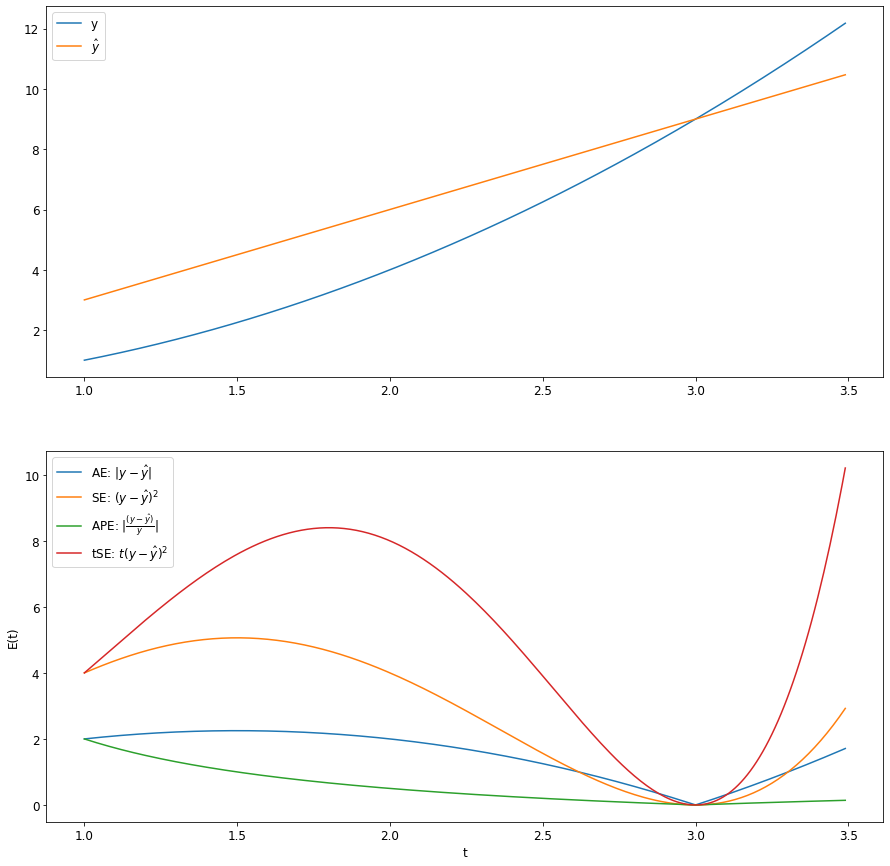

<Figure size 1080x432 with 0 Axes>

In [23]:
x = np.arange(1, 3.5, 0.01)
y = x**2
y_h = 3*x
plotErrorFns(x, y, y_h)

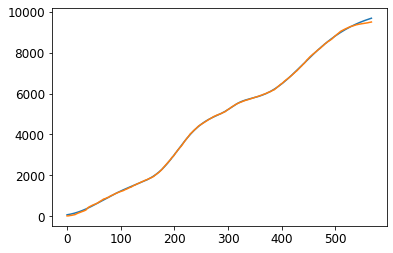

In [24]:
plt.plot(scaling_factor * y_m)
plt.plot(scaling_factor * acc_data[:x_nw[-1]]) # last elt

SAE:  12658.58014732046
SSE:  764458.459705044
SAPE:  49.58825255079031
MAE:  22.286232653733205
MSE:  1345.8775699032465
MAPE:  0.08730326153308153
RMSE:  36.68620408141522
rel. RMSE:  0.003862518854644685
ITSE: 316679713.6726346
MTSE (?): 557534.7071701314


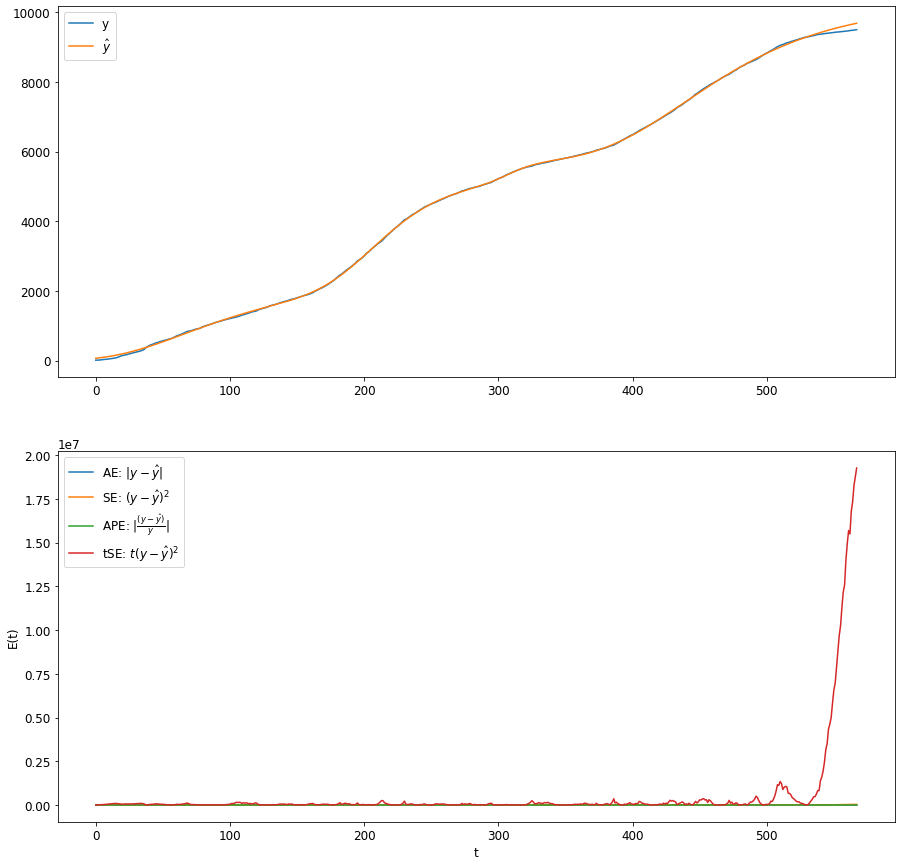

<Figure size 1080x432 with 0 Axes>

In [25]:
x = t[:x_nw[-1]]
y = scaling_factor * acc_data[:x_nw[-1]]
y_h = scaling_factor * y_m
plotErrorFns(x, y, y_h)

SAE:  2257.542883291153
SSE:  367899.05735872954
SAPE:  0.23847698735800402
MAE:  161.2530630922252
MSE:  26278.50409705211
MAPE:  0.017034070525571716
RMSE:  162.10645914661177
rel. RMSE:  0.01706743094826403
ITSE: 206503611.13224834
MTSE (?): 14750257.938017739


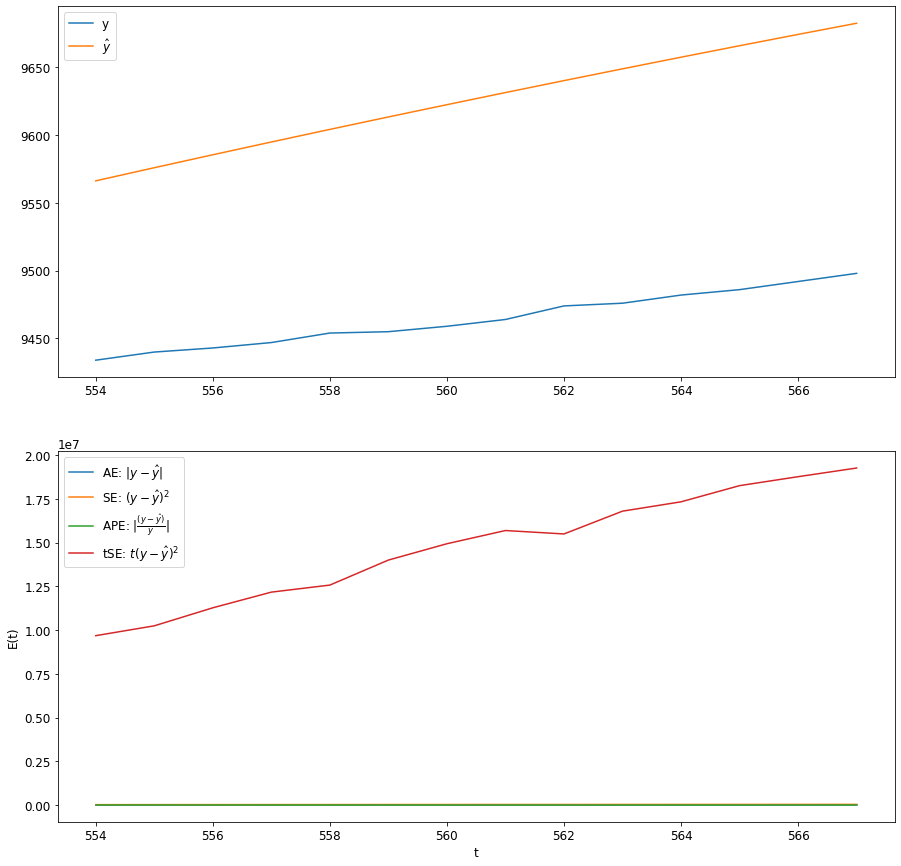

<Figure size 1080x432 with 0 Axes>

In [26]:
x = t[x_nw[-1] - 14:x_nw[-1]]
y = scaling_factor * acc_data[x_nw[-1] - 14:x_nw[-1]]
y_h = scaling_factor * y_m[x_nw[-1] - 14:]
plotErrorFns(x, y, y_h)

In [27]:
data.date[12:x_nw[-1] + 12]

12     2020-03-15
13     2020-03-16
14     2020-03-17
15     2020-03-18
16     2020-03-19
          ...    
575    2021-09-29
576    2021-09-30
577    2021-10-01
578    2021-10-02
579    2021-10-03
Name: date, Length: 568, dtype: object